In [ ]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/ubuntu data/kaggle.json" ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/car-plate-detection

 95% 193M/203M [00:01<00:00, 87.7MB/s]
100% 203M/203M [00:01<00:00, 131MB/s] 


In [ ]:
!unzip car-plate-detection.zip

Archive:  car-plate-detection.zip
  inflating: annotations/Cars0.xml   
  inflating: annotations/Cars1.xml   
  inflating: annotations/Cars10.xml  
  inflating: annotations/Cars100.xml  
  inflating: annotations/Cars101.xml  
  inflating: annotations/Cars102.xml  
  inflating: annotations/Cars103.xml  
  inflating: annotations/Cars104.xml  
  inflating: annotations/Cars105.xml  
  inflating: annotations/Cars106.xml  
  inflating: annotations/Cars107.xml  
  inflating: annotations/Cars108.xml  
  inflating: annotations/Cars109.xml  
  inflating: annotations/Cars11.xml  
  inflating: annotations/Cars110.xml  
  inflating: annotations/Cars111.xml  
  inflating: annotations/Cars112.xml  
  inflating: annotations/Cars113.xml  
  inflating: annotations/Cars114.xml  
  inflating: annotations/Cars115.xml  
  inflating: annotations/Cars116.xml  
  inflating: annotations/Cars117.xml  
  inflating: annotations/Cars118.xml  
  inflating: annotations/Cars119.xml  
  inflating: annotations/Cars12.xm

## installing TrOCR transformer based OCR model


In [ ]:
!pip install -q transformers
!pip install -q sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.4 MB/s eta 0:00:00


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from tqdm.auto import tqdm
from urllib.request import urlretrieve
from zipfile import ZipFile

import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import glob

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

In [ ]:
def read_image(image_path):
    """
    :param image_path: String, path to the input image.

    Returns:
        image: PIL Image.
    """
    image = Image.open(image_path).convert('RGB')
    return image

In [ ]:
def ocr(image, processor, model):
    """
    :param image: PIL Image.
    :param processor: Huggingface OCR processor.
    :param model: Huggingface OCR model.

    Returns:
        generated_text: the OCR'd text string.
    """
    # We can directly perform OCR on cropped images.
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

In [ ]:
def eval_new_data(image, model=None):
        text = ocr(image, processor, model)
        if len(text)>=3 and len(text)<=20:
          plt.figure(figsize=(7, 4))
          plt.imshow(image)
          plt.title(text)
          plt.axis('off')
          plt.show()

## model 1 printed text

In [ ]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed')
model1 = VisionEncoderDecoderModel.from_pretrained(
    'microsoft/trocr-small-printed'
).to(device)

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# eval_new_data(
#     data_path=os.path.join('parent_folder', 'child_folder_of imge', '*'),
#     model=model1
# )

## wild text model

In [ ]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed')
model2 = VisionEncoderDecoderModel.from_pretrained(
    'microsoft/trocr-small-printed'
).to(device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg

--2023-12-26 03:14:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.6MB/s    in 8.5s    

2023-12-26 03:14:33 (28.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2023-12-26 03:14:33--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2023-12-26 03:14:33--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.c

In [ ]:
import cv2
import imutils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

(-0.5, 399.5, 266.5, -0.5)

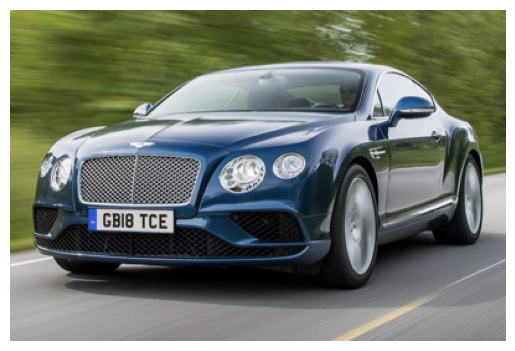

In [ ]:
l=os.listdir('./images/')
i=l[2]
img=cv2.imread('./images/'+i)
# img=cv2.imread('./m/5.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_org=img.copy()
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.axis('off')

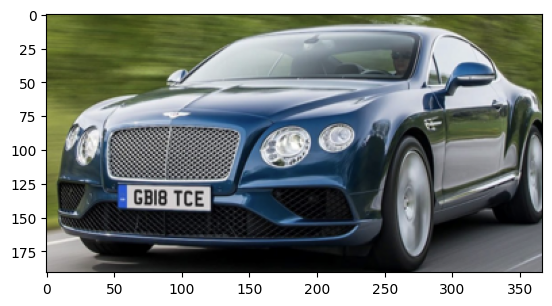

In [ ]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img.copy(), 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.50:
            # Object detected
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

try:
  # sort the box on area
  sorted_boxes = sorted(zip(boxes, confidences, class_ids), key=lambda x: x[0][2] * x[0][3], reverse=True)
  boxes, confidences, class_ids = zip(*sorted_boxes)
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

  # Crop and save each detected object

  x, y, w, h = boxes[0]
  roi = img[y:y+h, x:x+w]
  area_new=roi.shape[0]*roi.shape[1]
  area_old=img.shape[0]*img.shape[1]
  ratio=area_new/area_old
  if ratio<0.7:
    gray=cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
    img=roi
    cv2.imwrite("crop.jpg",img)
    plt.imshow(roi)
  else:
    print("taking old image only")
except:
  print("No car detected")

## Yellow number plate

In [ ]:
## yellow color detection 0,30,43,54,255,255
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
lower_bound=np.array([0,50,15]) # 0,7,15
upper_bound=np.array([106,255,255]) # 106
mask=cv2.inRange(hsv,lower_bound,upper_bound)
thresh=cv2.bitwise_and(img,img,mask=mask)
thresh=cv2.cvtColor(thresh,cv2.COLOR_RGB2GRAY)

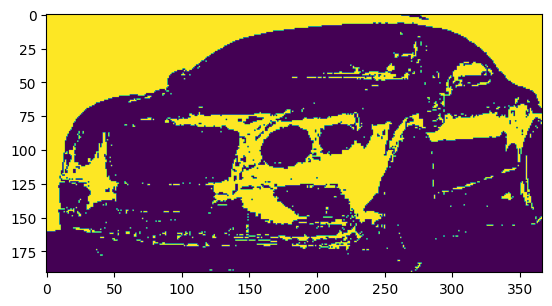

In [ ]:
_, thresh = cv2.threshold(thresh,0,255,cv2.THRESH_BINARY)
# thresh=cv2.Canny(thresh,120,500)
plt.imshow(thresh)

## White number plate

In [ ]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
lower_bound=np.array([0,0,97])  ## 0,0,160
upper_bound=np.array([114,173,255]) ## 65,160,255
mask=cv2.inRange(hsv,lower_bound,upper_bound)
thresh=cv2.bitwise_and(img,img,mask=mask)
thresh=cv2.cvtColor(thresh,cv2.COLOR_RGB2GRAY)

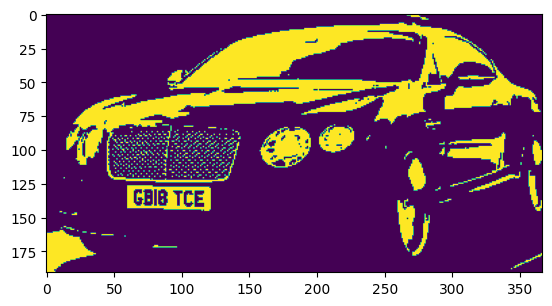

In [ ]:
# thresh=cv2.blur(thresh,(3,3))
_, thresh = cv2.threshold(thresh,0,255,cv2.THRESH_BINARY)
# thresh=cv2.Canny(thresh,120,500)
plt.imshow(thresh)

## or alone

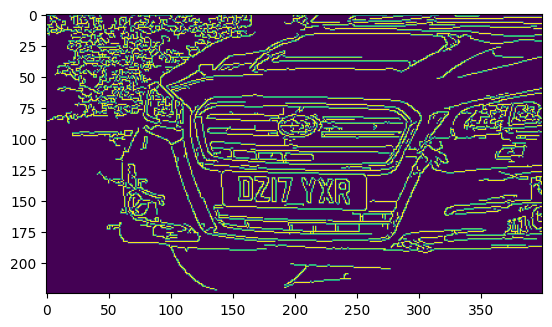

In [ ]:
## or alone

thresh=cv2.Canny(gray,30,300)
plt.imshow(thresh)

##final

In [ ]:
cnts, hier = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts,key=cv2.contourArea, reverse=True)[:30]
location=[]
for c in cnts:
  if any([point[0][0] == 0 or point[0][1] == 0 or point[0][0] == thresh.shape[1] - 1 or point[0][1] == thresh.shape[0] - 1 for point in c]):
    continue
  epsilon = (0.02)*cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,epsilon,True)
  if len(approx)==4:
    location.append(approx)
    x1,y1,w1,h1 = cv2.boundingRect(c)
    # new_img=img_org[y1+y:y1+h1+y,x1+x:x+x1+w1]
    new_img=img[y1:y1+h1,x1:x1+w1]
    break

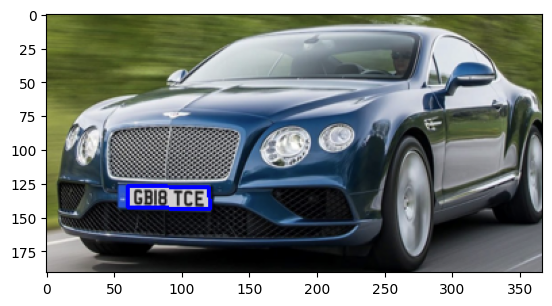

In [ ]:
img_c=img.copy()
img_c=cv2.drawContours(img_c,location,-1 ,(0,0,255),2)
plt.imshow(img_c)

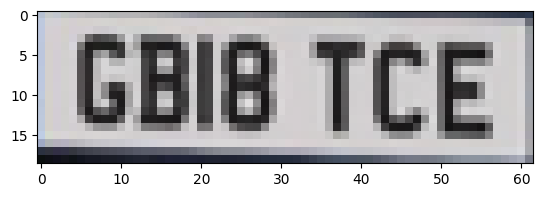

In [ ]:
plt.imshow(new_img)

In [ ]:
gray_new=cv2.cvtColor(new_img,cv2.COLOR_RGB2GRAY)

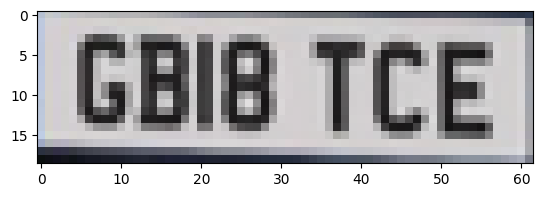

In [ ]:
img_c=new_img.copy()
plt.imshow(img_c)

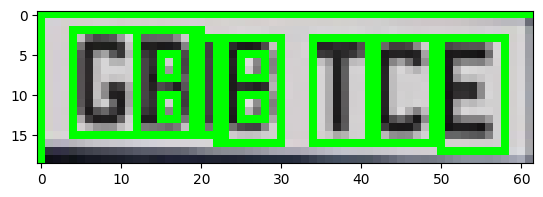

In [ ]:
cnts, hier = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts,key=cv2.contourArea, reverse=True)
for c in cnts:
  area=cv2.contourArea(c)
  epsilon = (0.01)*cv2.arcLength(c,True) ## keep 0.01,0.0001 etc not more than 0.01 it changes dimension of bounding rectangle
  data = cv2.approxPolyDP(c,epsilon,True) ## true return value to data
  hull=cv2.convexHull(data) ## draw a hull
  x,y,w,h = cv2.boundingRect(hull)
  img_c=cv2.rectangle(img_c,(x,y),(x+w,y+h),(0,255,0),1)

plt.imshow(img_c)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


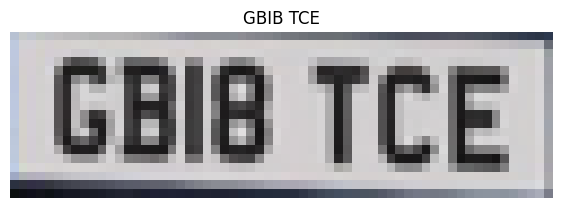

In [ ]:
eval_new_data(new_img,model=model1)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


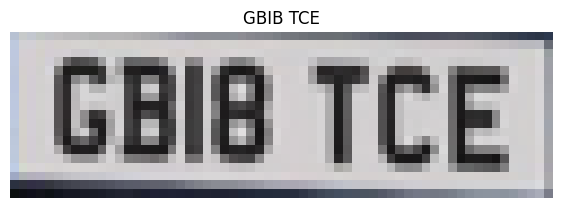

In [ ]:
eval_new_data(new_img,model=model2)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


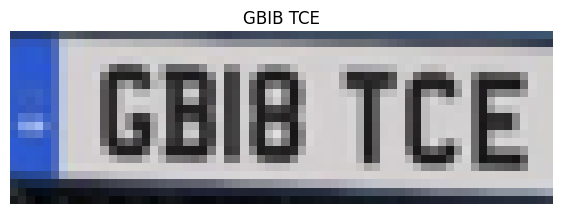

In [ ]:
import re

l = './annotations/' + i.split('.')[0] + '.xml'

with open(l, 'rb') as f:
    # Read the file content line by line
    text = b''
    for line in f:
        text += line

    # Convert bytes to string
    text_str = text.decode('utf-8')

    # Use regex to extract values
    xmin_match = re.search(r'<xmin>(\d+)</xmin>', text_str)
    xmax_match = re.search(r'<xmax>(\d+)</xmax>', text_str)
    ymin_match = re.search(r'<ymin>(\d+)</ymin>', text_str)
    ymax_match = re.search(r'<ymax>(\d+)</ymax>', text_str)

    # Extract values
    xmin = int(xmin_match.group(1)) if xmin_match else None
    xmax = int(xmax_match.group(1)) if xmax_match else None
    ymin = int(ymin_match.group(1)) if ymin_match else None
    ymax = int(ymax_match.group(1)) if ymax_match else None
    f.close()
    plate=img_org[ymin:ymax,xmin:xmax]


eval_new_data(plate,model=model1)

In [ ]:
### score checking
results=[]

In [ ]:
def plt_fig(img):
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

6.png


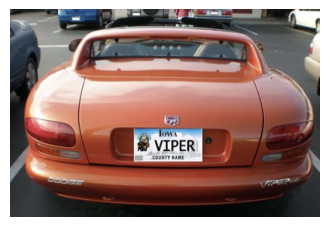

taking old image only


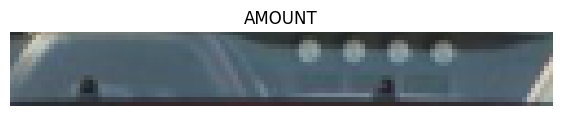

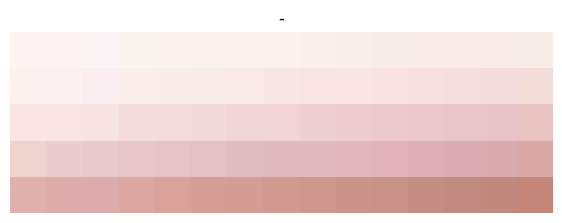

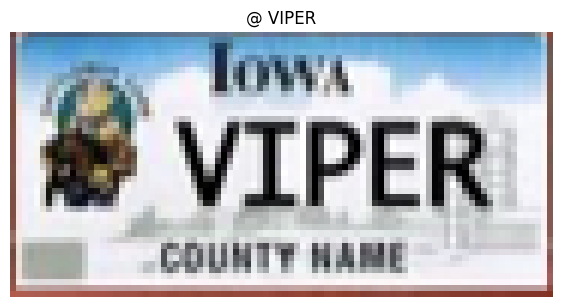



4.png


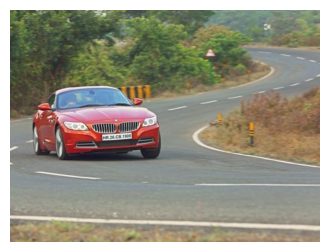

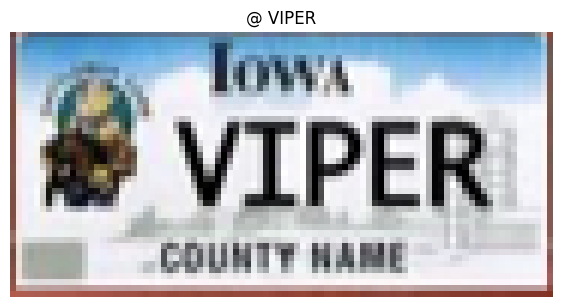

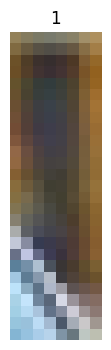

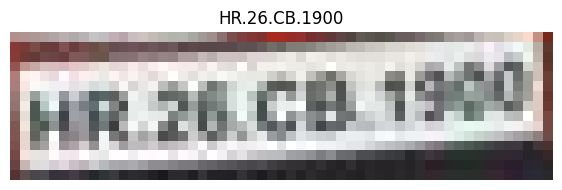



5.jpg


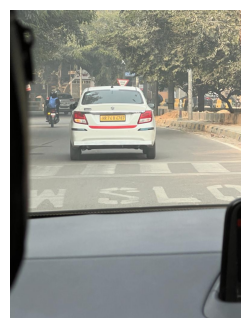

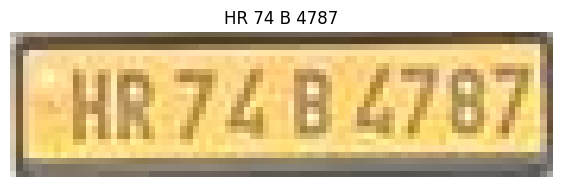

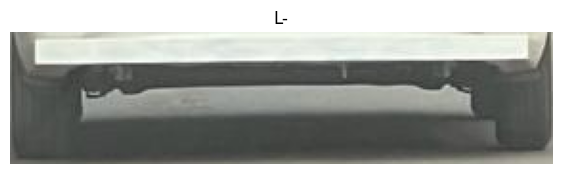

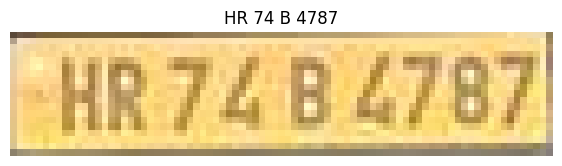



4.jpg


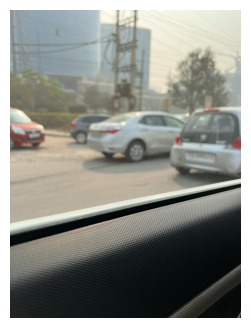

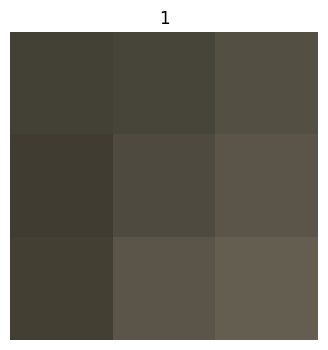

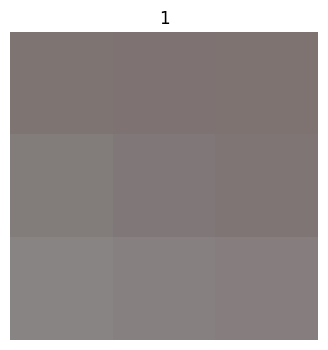

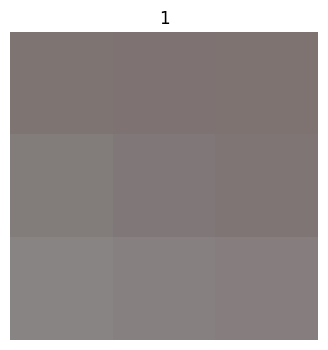



3.png


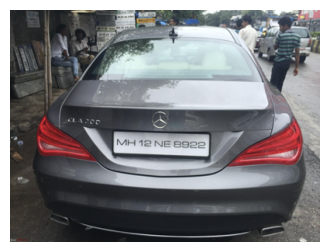

taking old image only


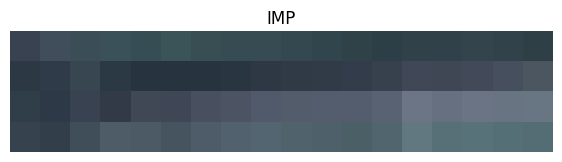

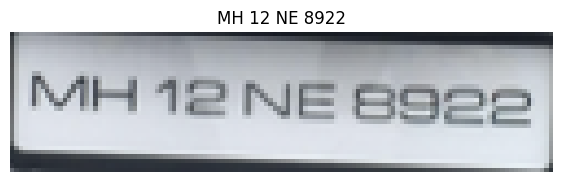

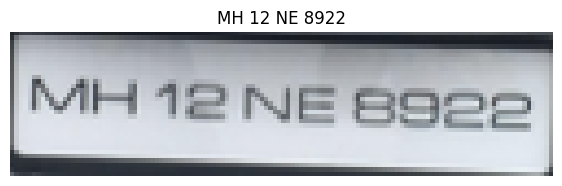



2.jpeg


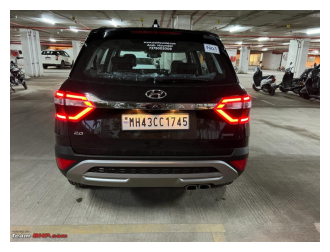

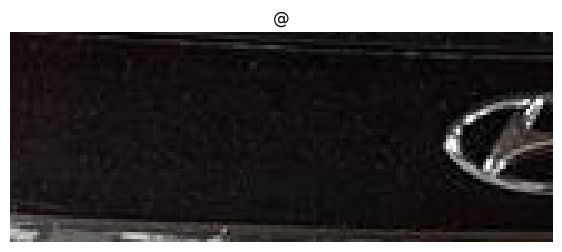

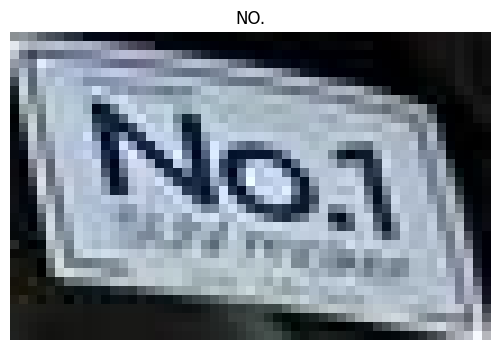

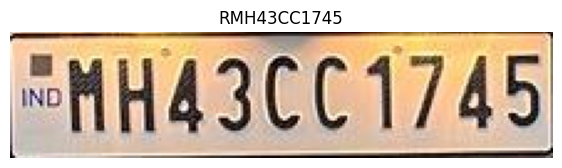



1.png


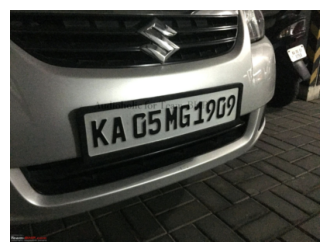

No car detected


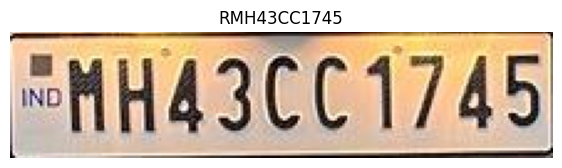

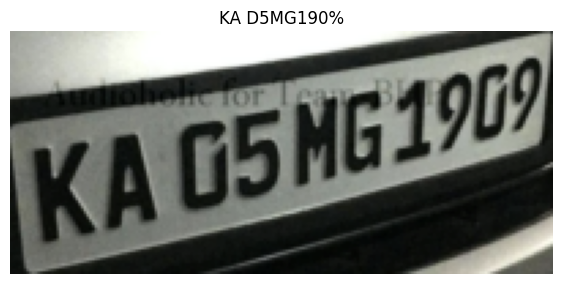

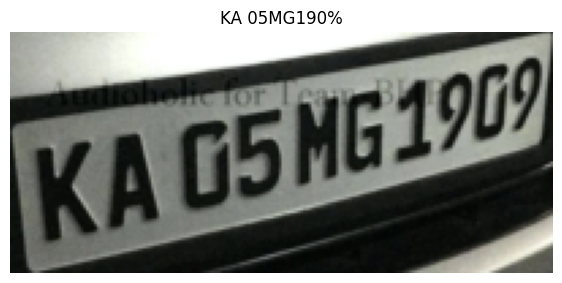



6.jpg


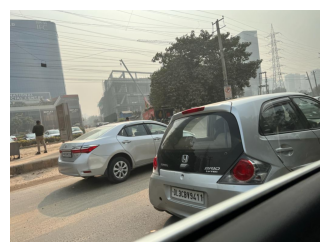

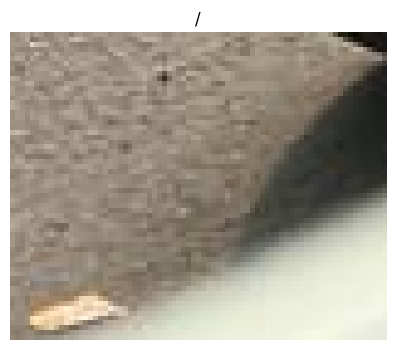

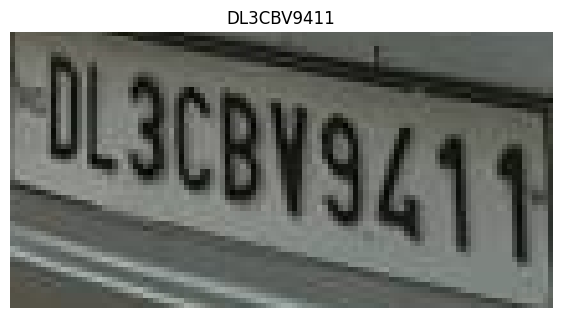

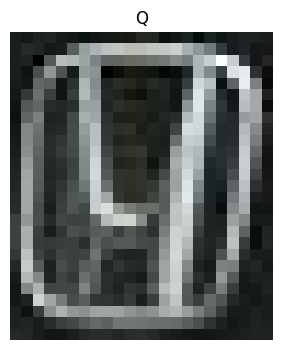



7.png


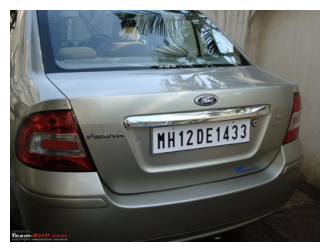

taking old image only


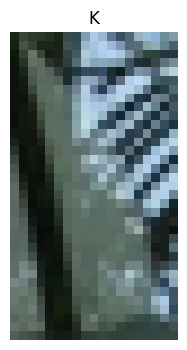

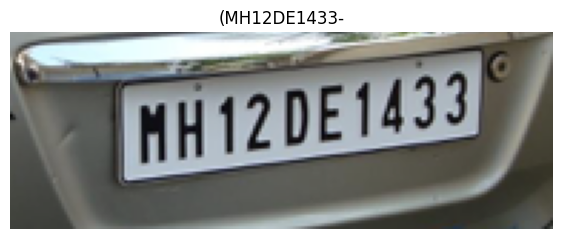

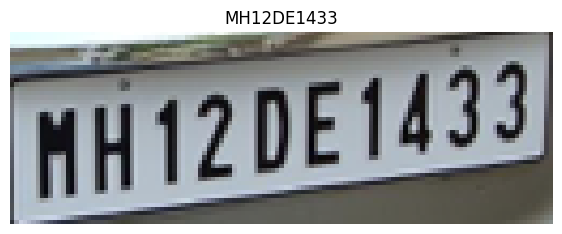



1.jpg


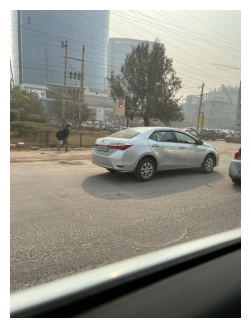

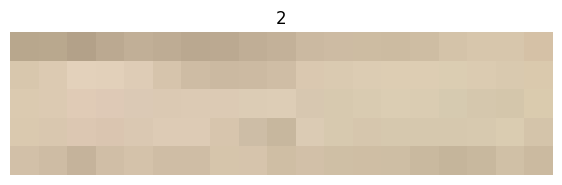

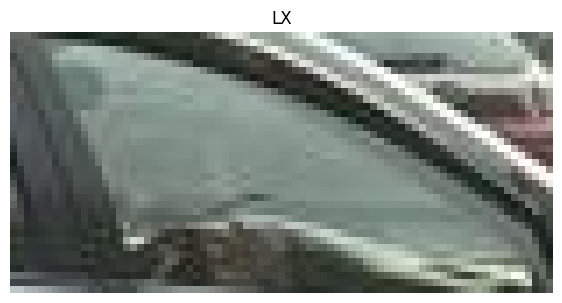

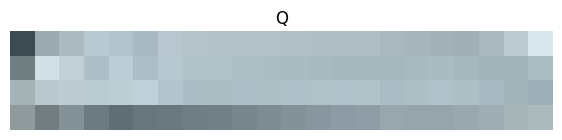



7.jpg


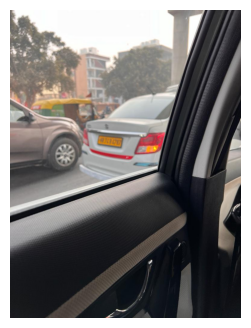

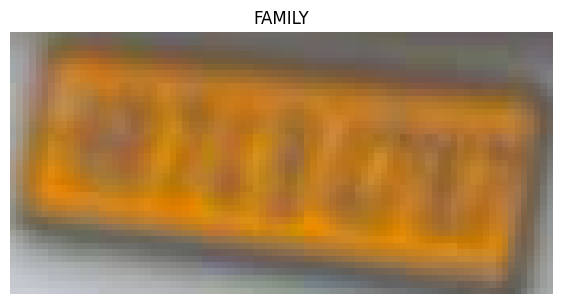

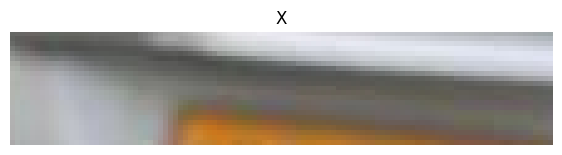

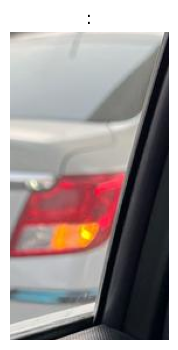



10.jpg


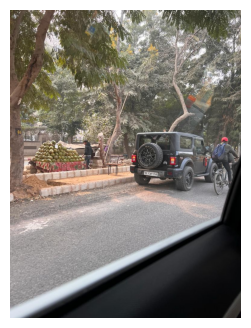

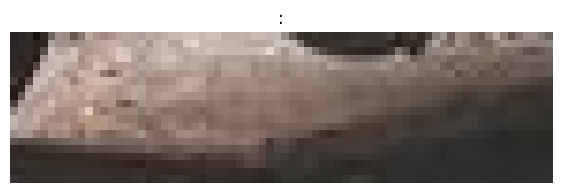

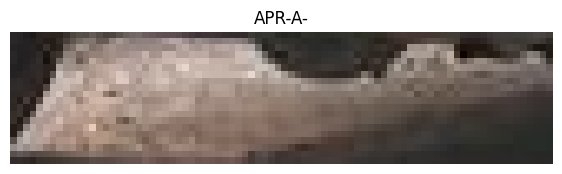

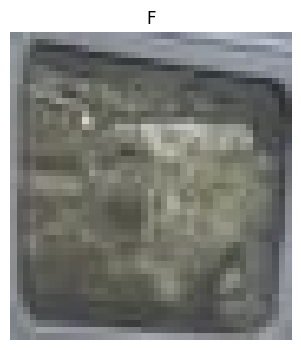



9.jpg


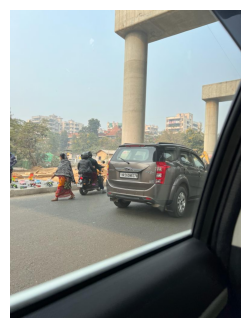

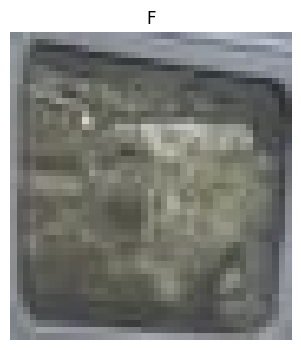

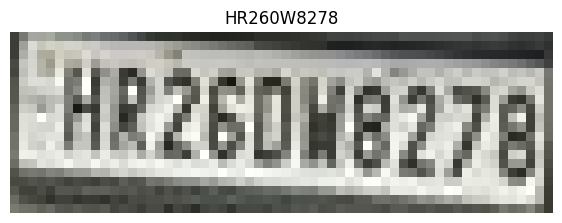

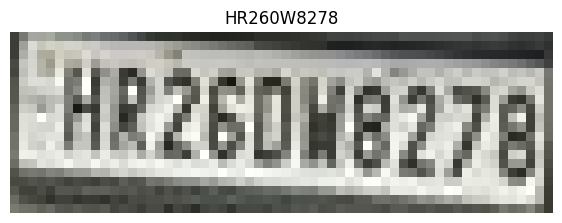



5.png


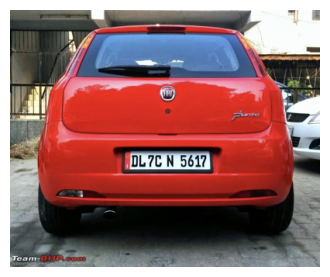

taking old image only


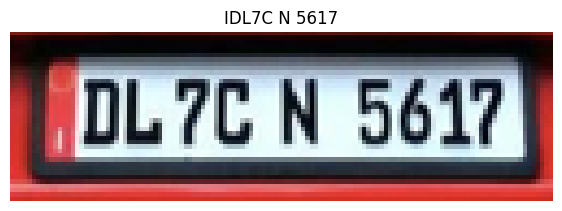

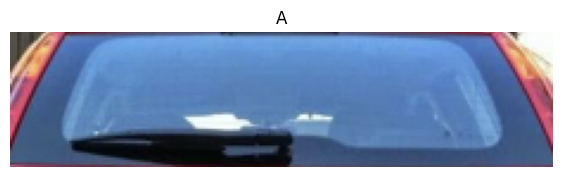

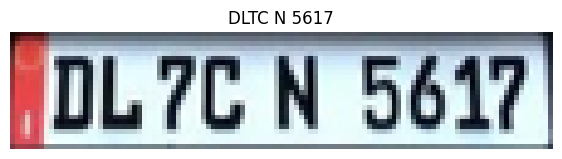



8.png


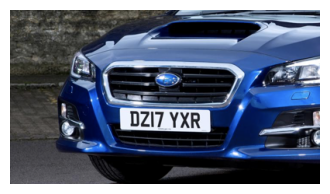

No car detected


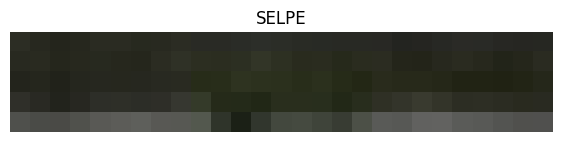

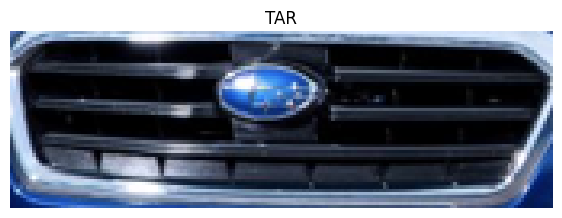

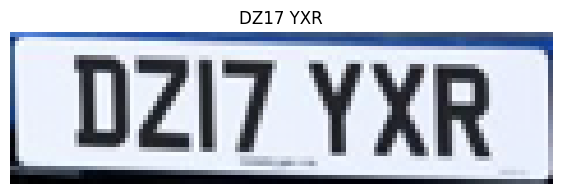



8.jpg


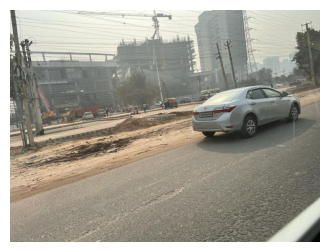

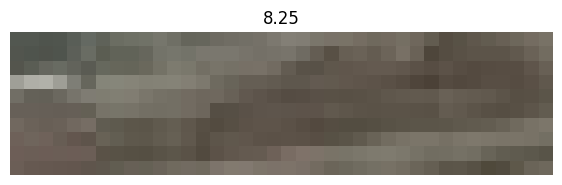

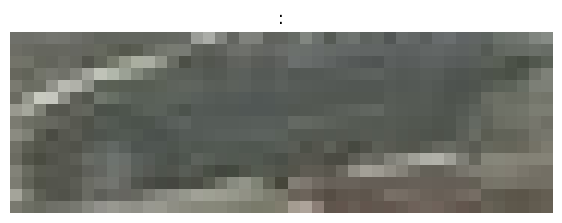

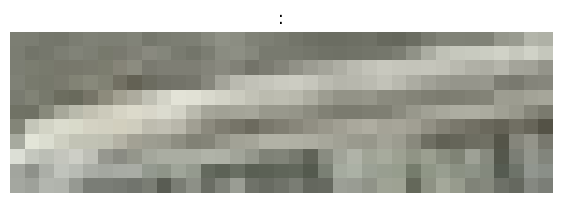



2.png


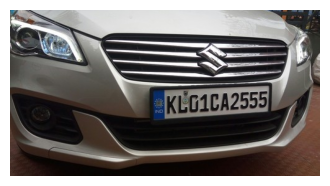

No car detected


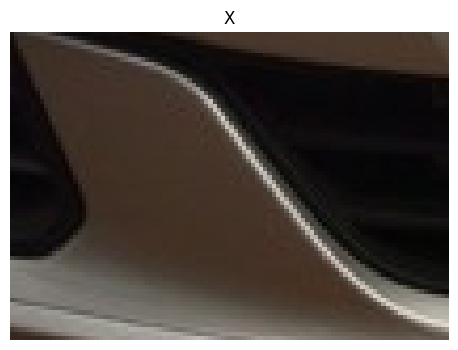

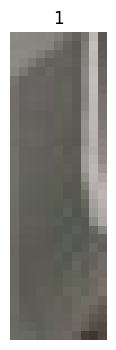

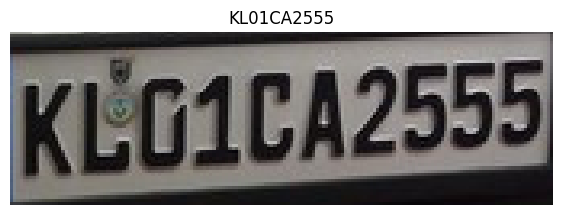

In [ ]:
l=os.listdir('./k')
for image in l:
  print(image)
  img=cv2.imread('./k/'+image)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt_fig(img)
  img_org=img.copy()
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Detecting objects
  blob = cv2.dnn.blobFromImage(img.copy(), 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)

  # Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.50:
              # Object detected
              center_x = int(detection[0] * img.shape[1])
              center_y = int(detection[1] * img.shape[0])
              w = int(detection[2] * img.shape[1])
              h = int(detection[3] * img.shape[0])

              # Rectangle coordinates
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)

              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  try:
    # sort the box on area
    sorted_boxes = sorted(zip(boxes, confidences, class_ids), key=lambda x: x[0][2] * x[0][3], reverse=True)
    boxes, confidences, class_ids = zip(*sorted_boxes)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Crop and save each detected object

    x, y, w, h = boxes[0]
    roi = img[y:y+h, x:x+w]
    area_new=roi.shape[0]*roi.shape[1]
    area_old=img.shape[0]*img.shape[1]
    ratio=area_new/area_old
    if ratio<0.7:
      gray=cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
      img=roi
      cv2.imwrite("crop.jpg",img)
    else:
      print("taking old image only")
  except:
    print("No car detected")
  try:
    ##yellow
    ## yellow color detection 0,30,43,54,255,255
    hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    lower_bound=np.array([0,50,15])
    upper_bound=np.array([106,255,255])
    mask=cv2.inRange(hsv,lower_bound,upper_bound)
    res=cv2.bitwise_and(img,img,mask=mask)
    res=cv2.cvtColor(res,cv2.COLOR_RGB2GRAY)
    thresh=cv2.blur(res,(3,3))
    _, thresh = cv2.threshold(res,0,255,cv2.THRESH_BINARY)

  #####
    cnts, hier = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted(cnts,key=cv2.contourArea, reverse=True)[:30]
    location=[]
    for c in cnts:
      if any([point[0][0] == 0 or point[0][1] == 0 or point[0][0] == thresh.shape[1] - 1 or point[0][1] == thresh.shape[0] - 1 for point in c]):
          continue
      epsilon = (0.03)*cv2.arcLength(c,True)
      approx=cv2.approxPolyDP(c,epsilon,True)
      if len(approx)==4:
        location.append(approx)
        x1,y1,w1,h1 = cv2.boundingRect(c)
        # new_img=img_org[y1+y:y1+h1+y,x1+x:x+x1+w1]
        new_img=img[y1:y1+h1,x1:x1+w1]
        break
    eval_new_data(new_img,model=model1)
    # pass
  #####
  except:
    print("yellow plate not work")
  try:
  ##white plate
    hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    lower_bound=np.array([0,0,97])  ## 0,0,160
    upper_bound=np.array([114,173,255]) ## 65,160,255
    mask=cv2.inRange(hsv,lower_bound,upper_bound)
    res=cv2.bitwise_and(img,img,mask=mask)
    thresh=cv2.cvtColor(res,cv2.COLOR_RGB2GRAY)
  #####
    _, thresh = cv2.threshold(thresh,0,255,cv2.THRESH_BINARY)
    cnts, hier = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted(cnts,key=cv2.contourArea, reverse=True)[:30]
    location=[]
    for c in cnts:
      if any([point[0][0] == 0 or point[0][1] == 0 or point[0][0] == thresh.shape[1] - 1 or point[0][1] == thresh.shape[0] - 1 for point in c]):
        continue
      epsilon = (0.03)*cv2.arcLength(c,True)
      approx=cv2.approxPolyDP(c,epsilon,True)
      if len(approx)==4:
        location.append(approx)
        x1,y1,w1,h1 = cv2.boundingRect(c)
        # new_img=img_org[y1+y:y1+h1+y,x1+x:x+x1+w1]
        new_img=img[y1:y1+h1,x1:x1+w1]
        break
    eval_new_data(new_img,model=model1)
    # pass
  #####
  except:
    print("white plate not work")
  try:
    thresh=cv2.blur(gray,(3,3))
    thresh=cv2.Canny(thresh,30,300)
  #####
    cnts, hier = cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted(cnts,key=cv2.contourArea, reverse=True)[:30]
    location=[]
    for c in cnts:
      if any([point[0][0] == 0 or point[0][1] == 0 or point[0][0] == thresh.shape[1] - 1 or point[0][1] == thresh.shape[0] - 1 for point in c]):
        continue
      epsilon = (0.03)*cv2.arcLength(c,True)
      approx=cv2.approxPolyDP(c,epsilon,True)
      if len(approx)==4:
        location.append(approx)
        x1,y1,w1,h1 = cv2.boundingRect(c)
        # new_img=img_org[y1+y:y1+h1+y,x1+x:x+x1+w1]
        new_img=img[y1:y1+h1,x1:x1+w1]
        break
    eval_new_data(new_img,model=model1)
    # pass
  #####
  except:
    print("error in ",image)
  print("\n")